# Beams - catenaries

This notebook shows how to use Beam elements model a catenary.

For more info on beams see "Beams - structural beams".

This may sound strange, but a wire is just a beam without bending and torsion stiffness.

Also, to avoid the beam from coiling up, we can set the tension_only parameter to True.

In [1]:
from DAVE import *
from DAVE.jupyter import *
s = Scene();

Equilibrium-core version = 1.07
default resource folders:
/home/ruben/miniconda3/lib/python3.8/site-packages/DAVE/resources
/home/ruben/DAVE_models
/home/ruben/DAVE_book/DAVE-notebooks
embedWindow(verbose=True): could not load k3d module, try:
> pip install k3d      # and if necessary:
> conda install nodejs


In [2]:
left = s.new_axis("left", position = (0,0,10))
right = s.new_axis("right", position = (10,0,10))
cable = s.new_beam("cable", nodeA=left, nodeB = right,
                        EA = 10000,
                        EIy = 0, EIz = 0, GIp = 0,
                        L=20,
                        mass = 10,
                        tension_only = True,
                        n_segments=17)

s.solve_statics()

Solved to 6.017472928832035e-06.


True

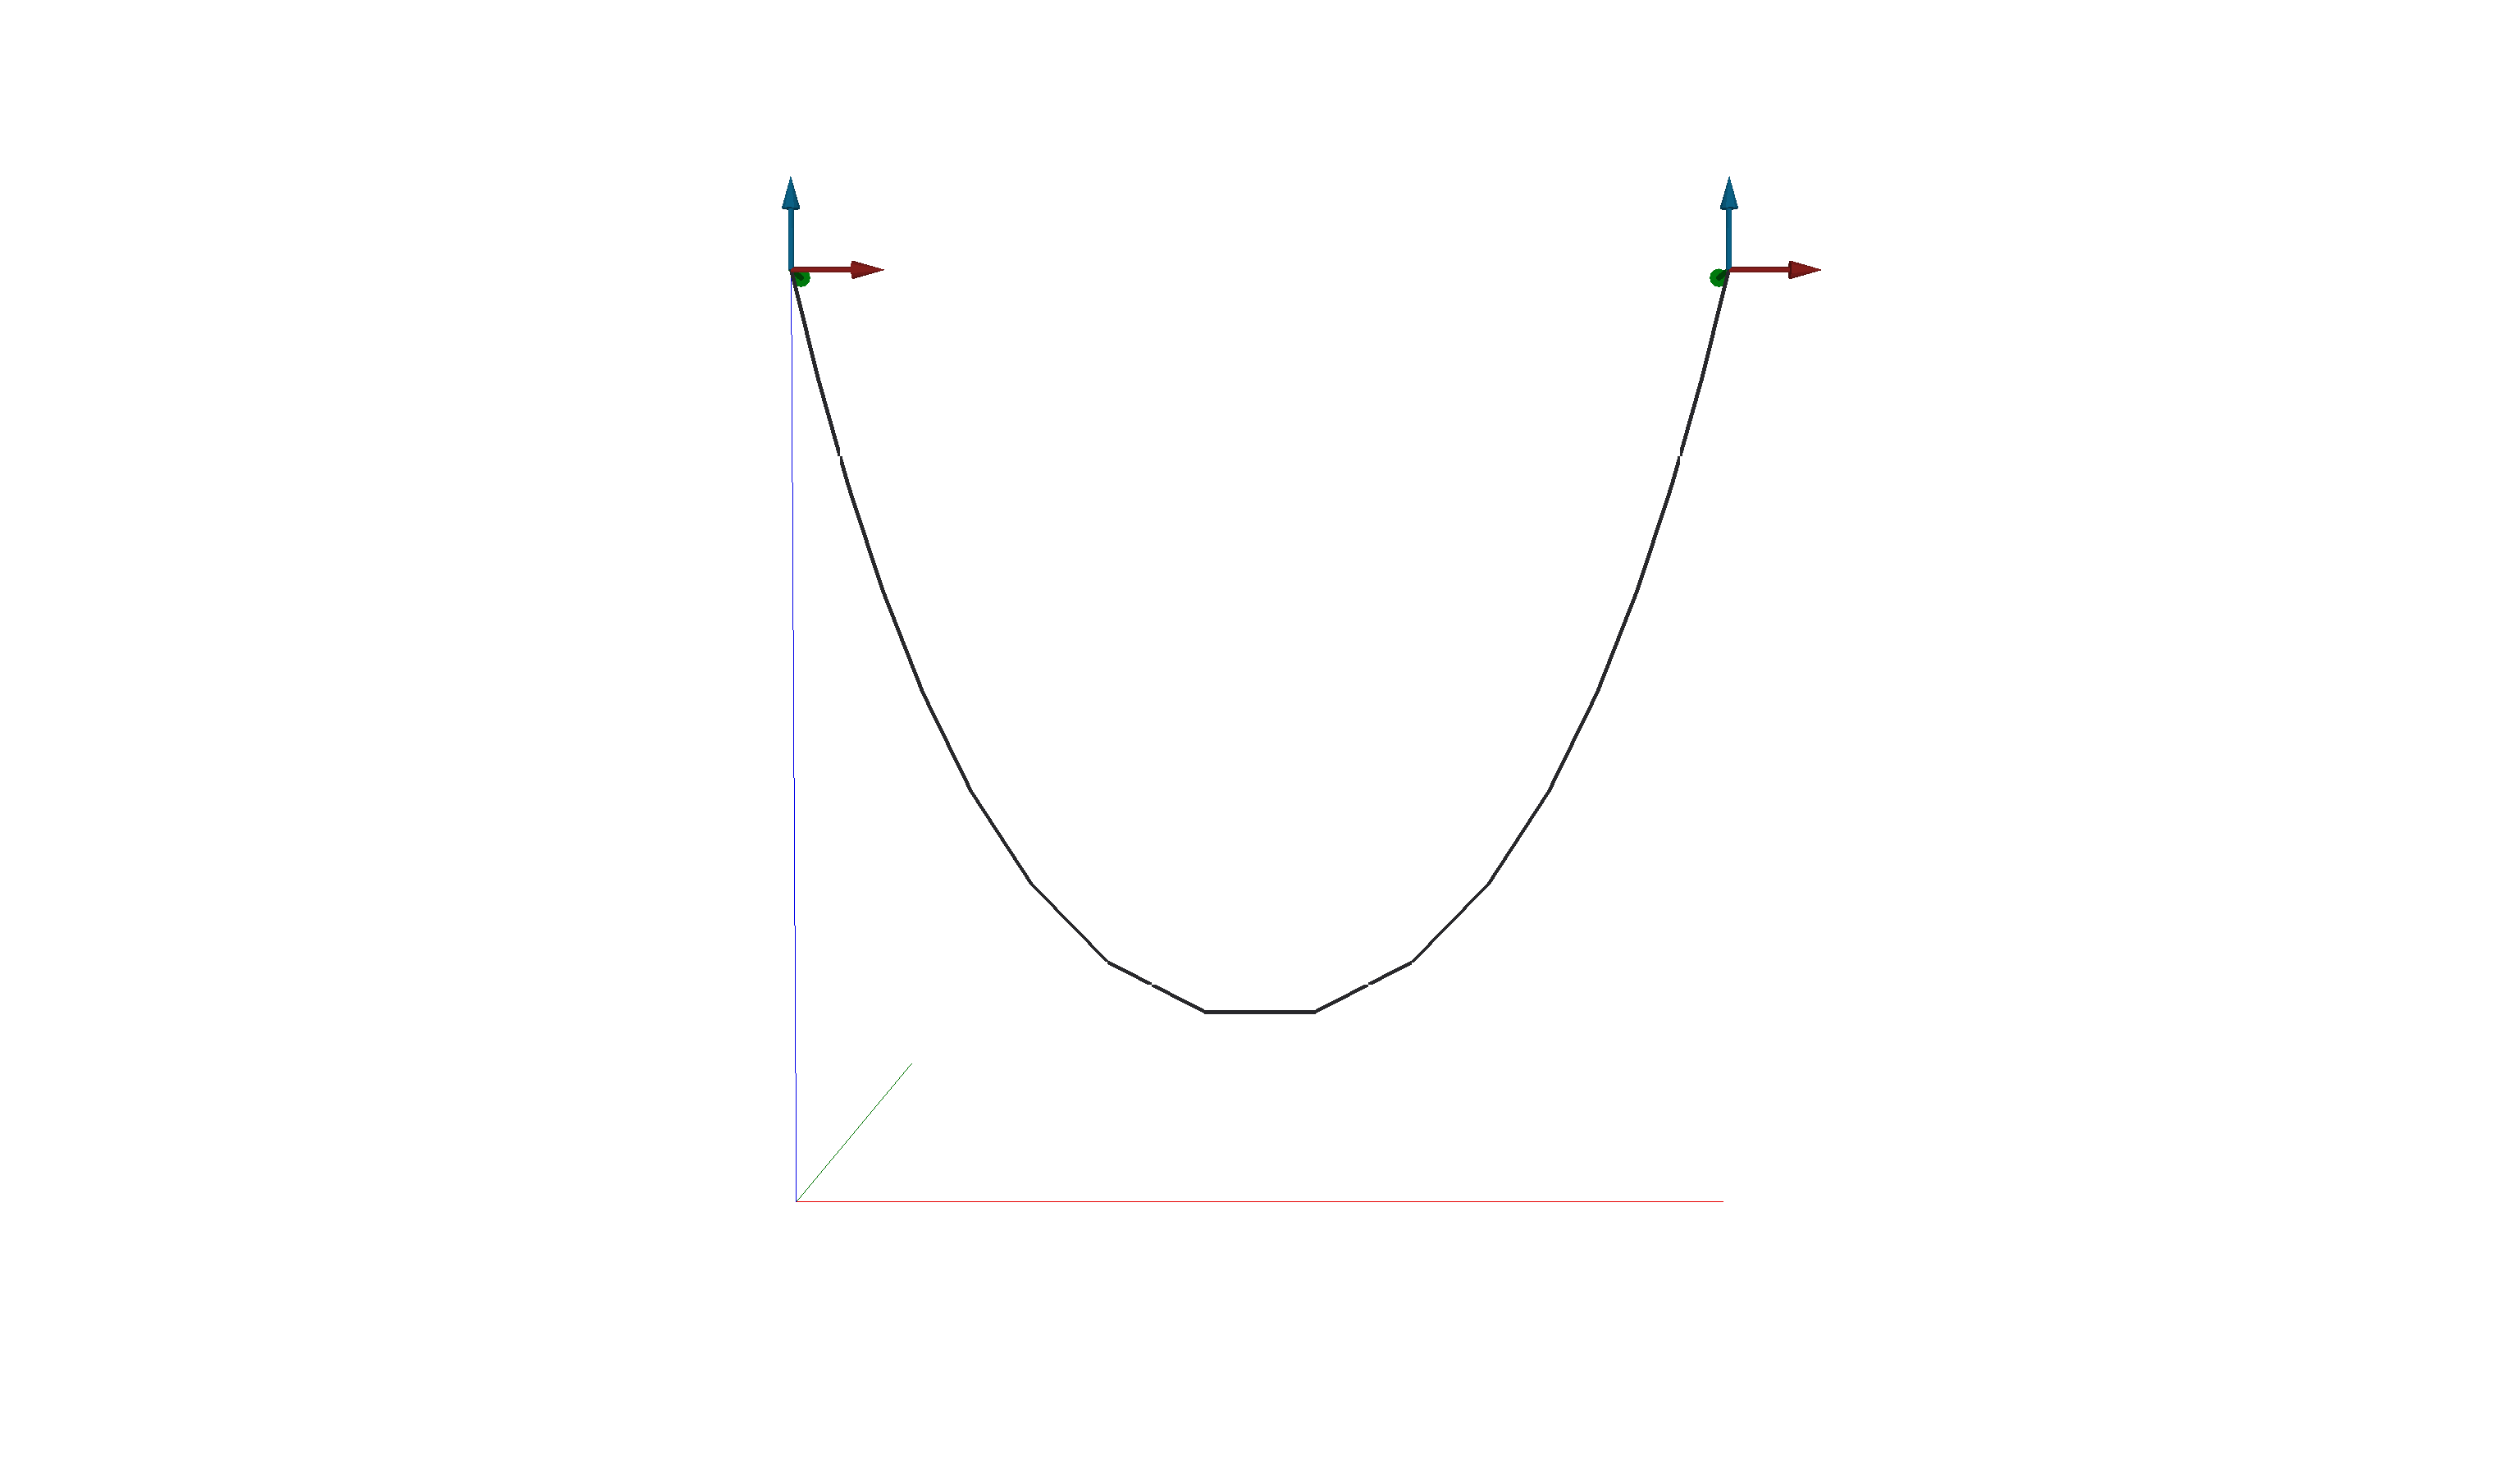

In [4]:
show(s, camera_pos=(5,-30,6), lookat = (5,0,5), sea=False)

The vertical force on both ends of the cable should be half the weight

In [20]:
0.5 * 9.81 * cable.mass

49.050000000000004

In [5]:
right.applied_force[2]

-49.050001056613986

well, seems right

Lets see the influence of the number of segments of the cable.

We could "manually" change that, but we can also use the "plot_effect" function from scene for that:

setting 1.0 results in -49.050000000000004
setting 2.0 results in -49.049999931377286
setting 3.0 results in -49.050000165624176
setting 4.0 results in -49.05001975719659
setting 5.0 results in -49.050001021669786
setting 6.0 results in -49.05000130115053
setting 7.0 results in -49.050001251510906
setting 8.0 results in -49.05000021746055
setting 9.0 results in -49.050000203424936
setting 10.0 results in -49.0499973465259
setting 11.0 results in -49.05000066124085
setting 12.0 results in -49.050000381221636
setting 13.0 results in -49.049998749967294
setting 14.0 results in -49.05000735429244
setting 15.0 results in -49.04999938660025
setting 16.0 results in -49.049991966873996
setting 17.0 results in -49.050001056613986
setting 18.0 results in -49.04999950490392
setting 19.0 results in -49.049998956605535
setting 20.0 results in -49.05000154428009
setting 21.0 results in -49.050000125602836
setting 22.0 results in -49.050001291120665
setting 23.0 results in -49.05000134207324
setting 

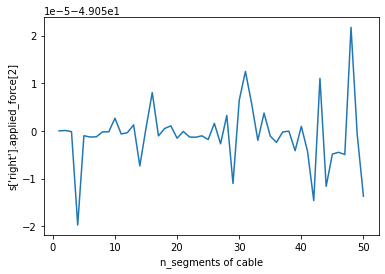

In [12]:
s.plot_effect(evaluate="s['right'].applied_force[2]",
   change_property="n_segments",
    change_node="cable",
    start=1,
    to=50.0,
    steps=50);

Same for horizontal force

setting 1.0 results in -49.050000000000004
setting 2.0 results in -54.60355785857687
setting 3.0 results in -50.305242892063134
setting 4.0 results in -52.235460533494965
setting 5.0 results in -51.218025353607324
setting 6.0 results in -51.71947820634479
setting 7.0 results in -51.47048161858018
setting 8.0 results in -51.59154595234599
setting 9.0 results in -51.53417634755871
setting 10.0 results in -51.5612999415816
setting 11.0 results in -51.54902735332355
setting 12.0 results in -51.55470397019678
setting 13.0 results in -51.552327121333796
setting 14.0 results in -51.55343561635338
setting 15.0 results in -51.55305032893226
setting 16.0 results in -51.55326500425588
setting 17.0 results in -51.55322498103337
setting 18.0 results in -51.55328409906111
setting 19.0 results in -51.5532987173905
setting 20.0 results in -51.55331683368261


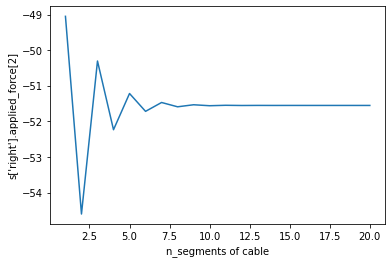

In [21]:
s.plot_effect(evaluate="s['right'].applied_force[2]",
   change_property="n_segments",
    change_node="cable",
    start=1,
    to=20.0,
    steps=20);